## Recupera os dados analisados e tratados, treina o modelo, fazendo a clusterização da qualidade do ar.

In [93]:
# importa bibliotecas
import pandas as pd

from sklearn.pipeline import Pipeline # permite uma sequência de estágios a serem executados
from sklearn.cluster import KMeans # algorítmo de clusterização
from sklearn.decomposition import PCA # reduz o nro de variáveis para otimizar o algorítmo do modelo
                                      # ajuda a evitar overfiting do modelo

from auxiliary_functions import plot_elbow_silhouette                        

pd.set_option('display.max_rows', None) # libera a exibição de todas as linhas 
pd.set_option('display.max_columns', None) # libera a exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe a exibição de advertências de warning

In [94]:
# carregando arquivo tratado em dataframe
df_quality = pd.read_csv('arquivos_tratados/df_quality_trans.csv')

In [95]:
# conferindo a dimensão do dataframe, linhas e colunas
df_quality.shape

(5296, 54)

In [96]:
df_quality = df_quality.sort_index()

In [97]:
df_quality.head(3)

CO/hr  C6H6-micgr/m3/hr  NMHC/hr  NOx-ppb/hr  NOx/hr  NO2-micgr/m3/hr  \
0  1473.0              14.3   1127.0       224.0   831.0            152.0   
1  1379.0              12.5   1068.0       171.0   899.0            139.0   
2  1385.0              12.2   1056.0       149.0   891.0            133.0   

   NO2/hr   03/hr  temperatura°C  umidade_relativa  umidade_absoluta  \
0  1752.0  1568.0           20.8              34.4            0.8365   
1  1663.0  1374.0           23.8              28.2            0.8219   
2  1648.0  1268.0           24.2              28.7            0.8515   

   dia_semana  hour  one-hot__dia_semana_0.0  one-hot__dia_semana_1.0  \
0         3.0  11.0                      0.0                      0.0   
1         3.0  12.0                      0.0                      0.0   
2         3.0  13.0                      0.0                      0.0   

   one-hot__dia_semana_2.0  one-hot__dia_semana_3.0  one-hot__dia_semana_4.0  \
0                      0.0                      1.0                      0.0   
1                      0.0                      1.0                      0.0   
2                      0.0                      1.0                      0.0   

   one-hot__dia_semana_5.0  one-hot__dia_semana_6.0  one-hot__hour_0.0  \
0                      0.0                      0.0                0.0   
1                      0.0                      0.0                0.0   
2                      0.0                      0.0                0.0   

   one-hot__hour_1.0  one-hot__hour_2.0  one-hot__hour_4.0  one-hot__hour_5.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   

   one-hot__hour_6.0  one-hot__hour_7.0  one-hot__hour_8.0  one-hot__hour_9.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   

   one-hot__hour_10.0  one-hot__hour_11.0  one-hot__hour_12.0  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 0.0   

   one-hot__hour_13.0  one-hot__hour_14.0  one-hot__hour_15.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 1.0                 0.0                 0.0   

   one-hot__hour_16.0  one-hot__hour_17.0  one-hot__hour_18.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   one-hot__hour_19.0  one-hot__hour_20.0  one-hot__hour_21.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   one-hot__hour_22.0  one-hot__hour_23.0  minmax__CO/hr  \
0                 0.0                 0.0       0.979344   
1                 0.0                 0.0       0.865128   
2                 0.0                 0.0       0.872418   

   minmax__C6H6-micgr/m3/hr  minmax__NMHC/hr  minmax__NOx-ppb/hr  \
0                  0.623853         0.736080            0.413408   
1                  0.541284         0.670379            0.314711   
2                  0.527523         0.657016            0.273743   

   minmax__NOx/hr  minmax__NO2-micgr/m3/hr  minmax__NO2/hr  minmax__03/hr  \
0        0.460571                 0.704225        0.663018       0.837333   
1        0.538286                 0.643192        0.611751       0.708000   
2        0.529143                 0.615023        0.6031

In [98]:
list(df_quality.columns)

['CO/hr',
 'C6H6-micgr/m3/hr',
 'NMHC/hr',
 'NOx-ppb/hr',
 'NOx/hr',
 'NO2-micgr/m3/hr',
 'NO2/hr',
 '03/hr',
 'temperatura°C',
 'umidade_relativa',
 'umidade_absoluta',
 'dia_semana',
 'hour',
 'one-hot__dia_semana_0.0',
 'one-hot__dia_semana_1.0',
 'one-hot__dia_semana_2.0',
 'one-hot__dia_semana_3.0',
 'one-hot__dia_semana_4.0',
 'one-hot__dia_semana_5.0',
 'one-hot__dia_semana_6.0',
 'one-hot__hour_0.0',
 'one-hot__hour_1.0',
 'one-hot__hour_2.0',
 'one-hot__hour_4.0',
 'one-hot__hour_5.0',
 'one-hot__hour_6.0',
 'one-hot__hour_7.0',
 'one-hot__hour_8.0',
 'one-hot__hour_9.0',
 'one-hot__hour_10.0',
 'one-hot__hour_11.0',
 'one-hot__hour_12.0',
 'one-hot__hour_13.0',
 'one-hot__hour_14.0',
 'one-hot__hour_15.0',
 'one-hot__hour_16.0',
 'one-hot__hour_17.0',
 'one-hot__hour_18.0',
 'one-hot__hour_19.0',
 'one-hot__hour_20.0',
 'one-hot__hour_21.0',
 'one-hot__hour_22.0',
 'one-hot__hour_23.0',
 'minmax__CO/hr',
 'minmax__C6H6-micgr/m3/hr',
 'minmax__NMHC/hr',
 'minmax__NOx-ppb/hr',


In [99]:
colunas_og =[
 'CO/hr',
 'C6H6-micgr/m3/hr',
 'NMHC/hr',
 'NOx-ppb/hr',
 'NOx/hr',
 'NO2-micgr/m3/hr',
 'NO2/hr',
 '03/hr',
 'temperatura°C',
 'umidade_relativa',
 'umidade_absoluta',
 'dia_semana',
 'hour',
]

colunas_trans = [
 'one-hot__dia_semana_0.0',
 'one-hot__dia_semana_1.0',
 'one-hot__dia_semana_2.0',
 'one-hot__dia_semana_3.0',
 'one-hot__dia_semana_4.0',
 'one-hot__dia_semana_5.0',
 'one-hot__dia_semana_6.0',
 'one-hot__hour_0.0',
 'one-hot__hour_1.0',
 'one-hot__hour_2.0',
 'one-hot__hour_4.0',
 'one-hot__hour_5.0',
 'one-hot__hour_6.0',
 'one-hot__hour_7.0',
 'one-hot__hour_8.0',
 'one-hot__hour_9.0',
 'one-hot__hour_10.0',
 'one-hot__hour_11.0',
 'one-hot__hour_12.0',
 'one-hot__hour_13.0',
 'one-hot__hour_14.0',
 'one-hot__hour_15.0',
 'one-hot__hour_16.0',
 'one-hot__hour_17.0',
 'one-hot__hour_18.0',
 'one-hot__hour_19.0',
 'one-hot__hour_20.0',
 'one-hot__hour_21.0',
 'one-hot__hour_22.0',
 'one-hot__hour_23.0',
 'minmax__CO/hr',
 'minmax__C6H6-micgr/m3/hr',
 'minmax__NMHC/hr',
 'minmax__NOx-ppb/hr',
 'minmax__NOx/hr',
 'minmax__NO2-micgr/m3/hr',
 'minmax__NO2/hr',
 'minmax__03/hr',
 'minmax__temperatura°C',
 'minmax__umidade_relativa',
 'minmax__umidade_absoluta',
 ]

In [100]:
df_quality_trans = df_quality[colunas_trans]
df_quality = df_quality[colunas_og]

In [101]:
print(df_quality_trans.info())
print(df_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   one-hot__dia_semana_0.0   5296 non-null   float64
 1   one-hot__dia_semana_1.0   5296 non-null   float64
 2   one-hot__dia_semana_2.0   5296 non-null   float64
 3   one-hot__dia_semana_3.0   5296 non-null   float64
 4   one-hot__dia_semana_4.0   5296 non-null   float64
 5   one-hot__dia_semana_5.0   5296 non-null   float64
 6   one-hot__dia_semana_6.0   5296 non-null   float64
 7   one-hot__hour_0.0         5296 non-null   float64
 8   one-hot__hour_1.0         5296 non-null   float64
 9   one-hot__hour_2.0         5296 non-null   float64
 10  one-hot__hour_4.0         5296 non-null   float64
 11  one-hot__hour_5.0         5296 non-null   float64
 12  one-hot__hour_6.0         5296 non-null   float64
 13  one-hot__hour_7.0         5296 non-null   float64
 14  one-hot_

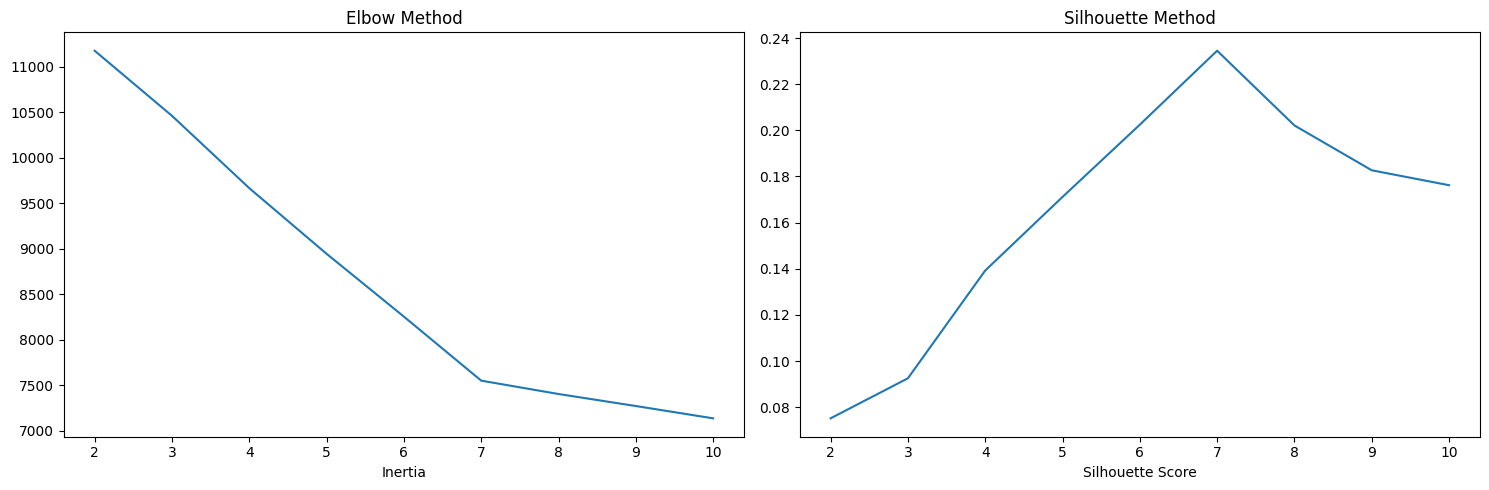

In [102]:
# gera os gráficos para definir a quantidade de clusters a serem considerados, usando os métodos
# do COTOVELO e da SILHUETA - aqui definido que o melhor tamanho de cluster será de 3
plot_elbow_silhouette(df_quality_trans)

- Pelo método do cotovelo e da silhueta verificamos que existe em comum um cotovelo na posição 3 em ambos os gráficos, sendo essa a quantidade escolhida para a formação dos clusters

In [103]:
# definindo o pipeline com pca e kmeans e gerando os clusters do modelo salvando o modelo na variável kmeans_cenipa
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)), # reduz o nro de variáveis para otimizar o algorítmo do modelo
                                                                 # ajuda a evitar overfiting do modelo
                                                                 # n_components=2 nro de componentes que serão mantidos
        ("clustering", KMeans(n_clusters=7, random_state=RANDOM_STATE, n_init=10))
                                                                 # clusteriza os acidentes aéreos
                                                                 # n_cluster=3 qtde de clusters que serão criados
                                                                 # n_init=10 nro de vezes de execução com diferentes combinações
                                                                 # do centróide

                                                                 # random_state nro da instância gerada e conservada
    ]
)

kmeans_cenipa = pipeline.fit(df_quality_trans) # faz o treinamento do modelo e já cria os clusters

- Nessa célula é definido uma instância do pipeline contendo a configuração necessária para o pca e para o algorítmo do KMeans. Esse modelo recebe o treinamento e gera os clusters dos acidentes aeronáuticos, ao mesmo tempo salvamos o modelo configurado na variável kmeans_cenipa que será gravada em arquivo .pkl no final desse módulo.

In [104]:
# mostra a configuração do modelo de clusterização kmeans_cenipa
kmeans_cenipa

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=7, n_init=10, random_state=42))])

In [105]:
# mostrando os nomes de recursos de saída dos clusters
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4', 'kmeans5',
       'kmeans6'], dtype=object)

In [106]:
# mostrando os labels de dados dos clusters
pipeline["clustering"].labels_

array([4, 4, 4, ..., 5, 5, 5])

In [107]:
# associando os dados transformados com a coluna de clusters criados
df_clustered = df_quality_trans.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

one-hot__dia_semana_0.0  one-hot__dia_semana_1.0  one-hot__dia_semana_2.0  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   one-hot__dia_semana_3.0  one-hot__dia_semana_4.0  one-hot__dia_semana_5.0  \
0                      1.0                      0.0                      0.0   
1                      1.0                      0.0                      0.0   
2                      1.0                      0.0                      0.0   
3                      1.0                      0.0                      0.0   
4                      1.0                      0.0                      0.0   

   one-hot__dia_semana_6.0  one-hot__hour_0.0  one-hot__hour_1.0  \
0                      0.0                0.0                0.0   
1                      0.0                0.0                0.0   
2                      0.0                0.0                0.0   
3                      0.0                0.0                0.0   
4                      0.0                0.0                0.0   

   one-hot__hour_2.0  one-hot__hour_4.0  one-hot__hour_5.0  one-hot__hour_6.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   one-hot__hour_7.0  one-hot__hour_8.0  one-hot__hour_9.0  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   one-hot__hour_10.0  one-hot__hour_11.0  one-hot__hour_12.0  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   one-hot__hour_13.0  one-hot__hour_14.0  one-hot__hour_15.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 1.0                 0.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 0.0                 1.0   

   one-hot__hour_16.0  one-hot__hour_17.0  one-hot__hour_18.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   one-hot__hour_19.0  one-hot__hour_20.0  one-hot__hour_21.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   one-hot__hour_22.0  one-hot__hour_23.0  minmax__CO/hr  \
0                 0.0                 0.0       0.979344   
1                 0.0                 0.0       0.865128   
2                 0.0       

In [110]:
# verificando a quantidade de linhas(acidentes) para cada cluster associado
df_clustered["cluster"].value_counts()

cluster
6    1147
0    1107
1     870
4     868
2     486
3     458
5     360
Name: count, dtype: int64

- Observamos uma quantidade bem distribuida de acidentes aeronáuticos entre os 3 clusters criados.

In [111]:
# cria e carrega a coluna de clusters para o dataframe com os dados categóricos e numéricos originais
df_quality['cluster'] = df_clustered['cluster']

- Aqui estamos fazendo uma associação dos clusters criados com os dados originais para que possamos levantar algumas estatísticas percentuais e em seguida caracterizar cada cluster.

In [112]:
# visualizando as primeiras linhas do dataframe de dados originais com seus clusters associados
df_quality.head(5)

CO/hr  C6H6-micgr/m3/hr  NMHC/hr  NOx-ppb/hr  NOx/hr  NO2-micgr/m3/hr  \
0  1473.0              14.3   1127.0       224.0   831.0            152.0   
1  1379.0              12.5   1068.0       171.0   899.0            139.0   
2  1385.0              12.2   1056.0       149.0   891.0            133.0   
3  1379.0              13.1   1087.0       137.0   901.0            126.0   
4  1322.0              14.4   1129.0       149.0   934.0            128.0   

   NO2/hr   03/hr  temperatura°C  umidade_relativa  umidade_absoluta  \
0  1752.0  1568.0           20.8              34.4            0.8365   
1  1663.0  1374.0           23.8              28.2            0.8219   
2  1648.0  1268.0           24.2              28.7            0.8515   
3  1660.0  1144.0           25.2              24.9            0.7829   
4  1639.0  1109.0           27.0              17.8            0.6275   

   dia_semana  hour  cluster  
0         3.0  11.0        4  
1         3.0  12.0        4  
2         3.0  13.0        4  
3         3.0  14.0        4  
4         3.0  15.0        4

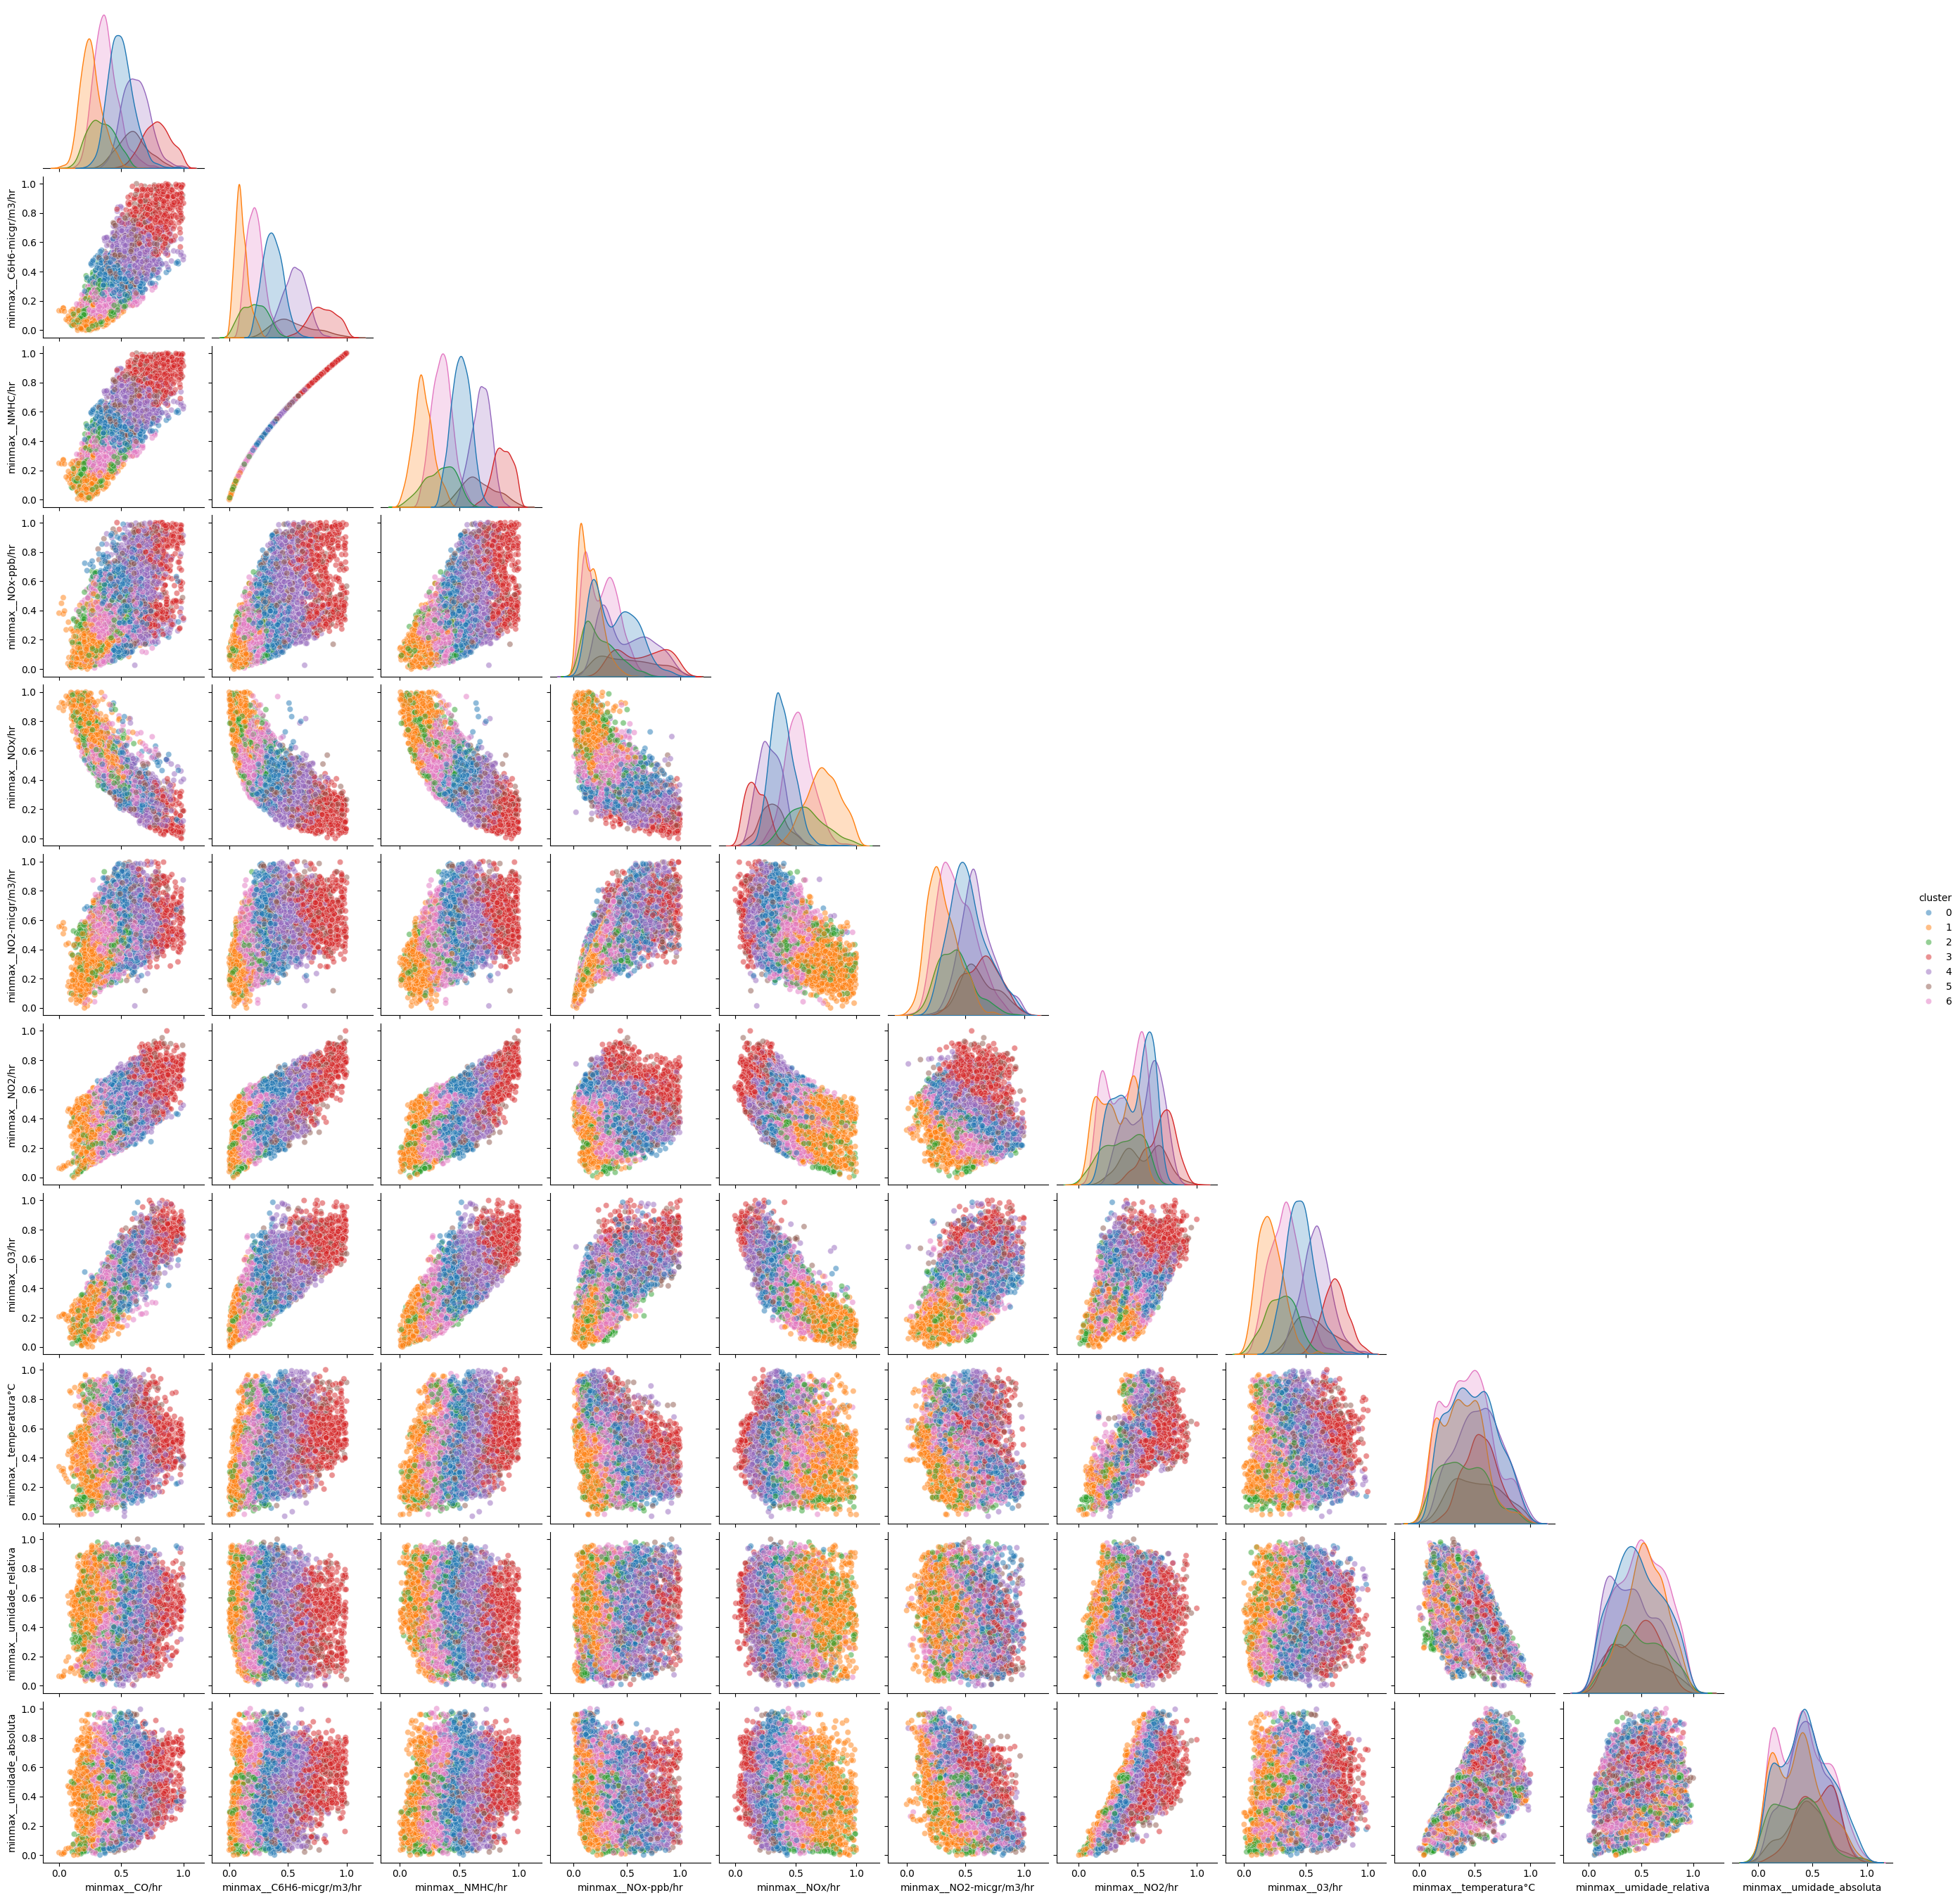

In [113]:
# plotando a distribuição dos dados numéricos agrupados em seus devidos clusters
columns_analysis = [
 'minmax__CO/hr',
 'minmax__C6H6-micgr/m3/hr',
 'minmax__NMHC/hr',
 'minmax__NOx-ppb/hr',
 'minmax__NOx/hr',
 'minmax__NO2-micgr/m3/hr',
 'minmax__NO2/hr',
 'minmax__03/hr',
 'minmax__temperatura°C',
 'minmax__umidade_relativa',
 'minmax__umidade_absoluta',
 ]
from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

- Plotando a distribuição dos dados numéricos por cluster observamos uma distribuição bastante uniforme nos clusters criados.

In [ ]:
# obtendo uma lista das colunas(variáveis) dos dados originais com a coluna de cluster
list(df_acidentes_aero)

['ocorrencia_classificacao',
 'ocorrencia_saida_pista',
 'aeronave_tipo_veiculo',
 'aeronave_motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_tipo_operacao',
 'aeronave_nivel_dano',
 'periodo',
 'ocorrencia_latitude',
 'ocorrencia_longitude',
 'cluster']